In [3]:
import cv2
import numpy as np
from skimage.io import imread, imsave
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC, SVC
from scipy import ndimage

In [4]:
def flatten_img(img):
    x, y, c = img.shape
    return img.reshape((x * y, c))

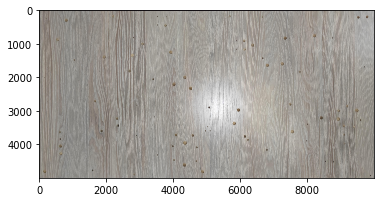

In [5]:
img = imread('res.jpg')
plt.imshow(img)

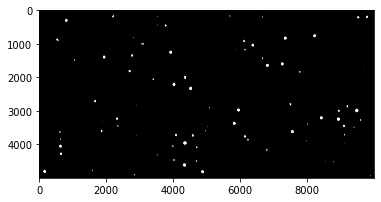

In [6]:
mask = imread('mask_svc.png')
# mask.png generate by GenTrainLabels.ipynb
plt.imshow(mask, cmap='gray')

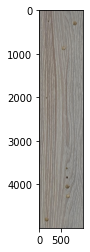

In [7]:
img_tmp = img[:, :1000, :]
plt.imshow(img_tmp)

In [8]:
svc = LinearSVC()

In [9]:
%%time
for x in range(1_000, 10_000, 1_000):
    img_tmp_flatten = flatten_img(img[:, x:x+1_000, :])
    mask_tmp_flatten = (mask[:, x:x+1_000] / 255).flatten()
    svc.fit(img_tmp_flatten, mask_tmp_flatten)

/home/kehua/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kehua/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kehua/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kehua/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kehua/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kehua/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to 

CPU times: user 29.9 s, sys: 2.27 s, total: 32.2 s
Wall time: 32.3 s


/home/kehua/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
%%time
pred_svc = svc.predict(flatten_img(img))

CPU times: user 811 ms, sys: 826 ms, total: 1.64 s
Wall time: 593 ms


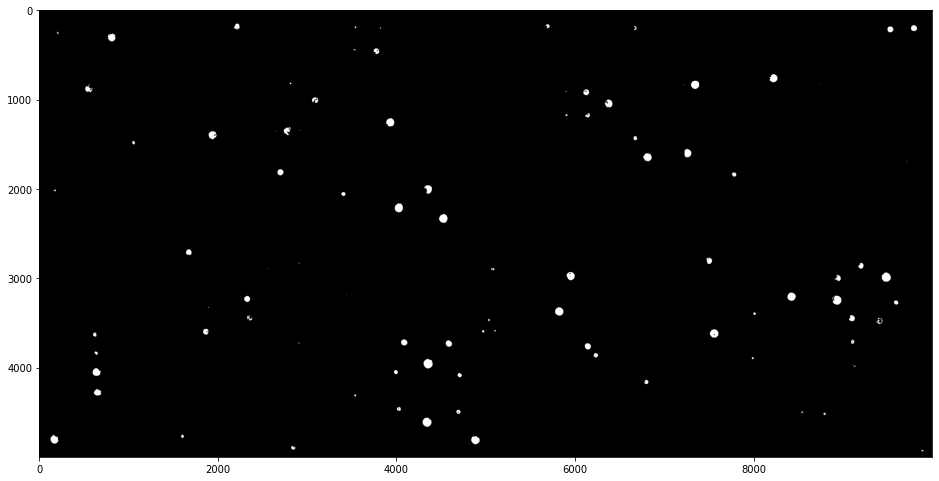

In [11]:
img_mask = pred_svc.reshape(img.shape[0], img.shape[1]).astype(np.uint8)
plt.figure(figsize=(16, 9))
plt.imshow(img_mask, cmap='gray')

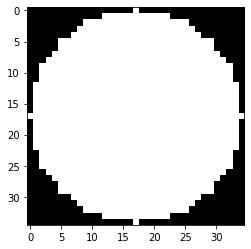

In [12]:
kernel_35 = np.zeros((35, 35), dtype=np.uint8)
cv2.circle(kernel_35, (17, 17), 17, (255,), -1)
plt.imshow(kernel_35, cmap='gray')

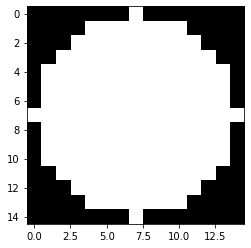

In [13]:
kernel_15 = np.zeros((15, 15), dtype=np.uint8)
cv2.circle(kernel_15, (7, 7), 7, (255,), -1)
plt.imshow(kernel_15, cmap='gray')

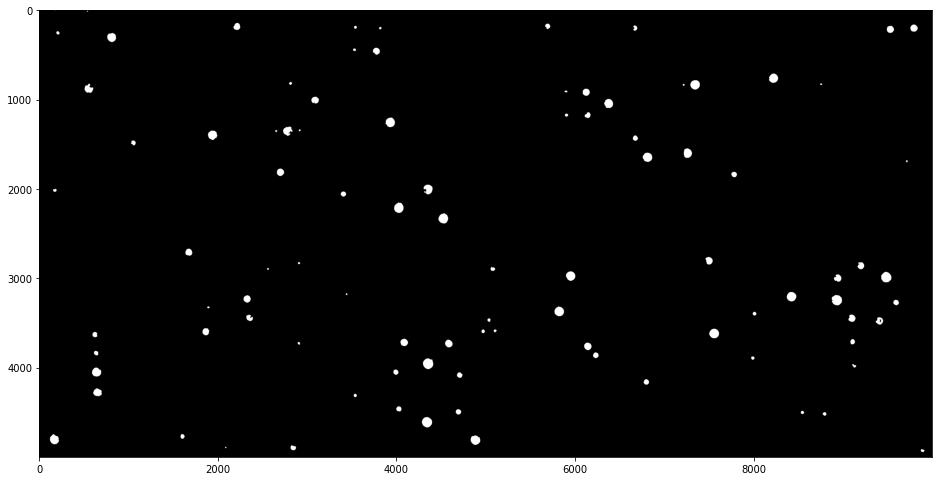

In [14]:
img_mask_erode = cv2.dilate(img_mask, kernel_15)
plt.figure(figsize=(16, 9))
plt.imshow(img_mask_erode, cmap='gray')

In [15]:
circles = cv2.HoughCircles(
        255 * img_mask_erode, # 8bit single-channel, grayscale input image
        cv2.HOUGH_GRADIENT, # Detection method
        2,                                              # Inverse ratio of the accumulator resolution to the image resolution
        130,                                         # Minimum distance of the two passed to the Canny edge detector
        param1 =100,                     # Higher threshold of the two passed to the  Canny edge detector
        param2 = 20,                      # The smaller it is , the more false circles may be detected
        minRadius=5,                    # Minimum circle radius
        maxRadius=50                 # Maximum circle radius
)

circles.shape

(1, 93, 3)

1.(6127.0, 919.0), diameter: 8
2.(2331.0, 3231.0), diameter: 8
3.(4711.0, 4083.0), diameter: 6
4.(1867.0, 3597.0), diameter: 8
5.(3091.0, 1011.0), diameter: 8
6.(2847.0, 4893.0), diameter: 6
7.(4087.0, 3717.0), diameter: 8
8.(6379.0, 1043.0), diameter: 10
9.(8943.0, 2999.0), diameter: 8
10.(811.0, 303.0), diameter: 10
11.(9101.0, 3449.0), diameter: 8
12.(9531.0, 215.0), diameter: 8
13.(9203.0, 2861.0), diameter: 7
14.(4697.0, 4493.0), diameter: 6
15.(6799.0, 4161.0), diameter: 6
16.(5951.0, 2971.0), diameter: 10
17.(3775.0, 461.0), diameter: 8
18.(9599.0, 3271.0), diameter: 6
19.(639.0, 4049.0), diameter: 10
20.(6147.0, 3759.0), diameter: 8
21.(1675.0, 2707.0), diameter: 8
22.(559.0, 881.0), diameter: 9
23.(2773.0, 1353.0), diameter: 8
24.(9795.0, 203.0), diameter: 8
25.(2703.0, 1817.0), diameter: 8
26.(1941.0, 1397.0), diameter: 10
27.(2215.0, 185.0), diameter: 8
28.(3995.0, 4049.0), diameter: 6
29.(7499.0, 2807.0), diameter: 9
30.(4589.0, 3733.0), diameter: 8
31.(5081.0, 2895.0), dia

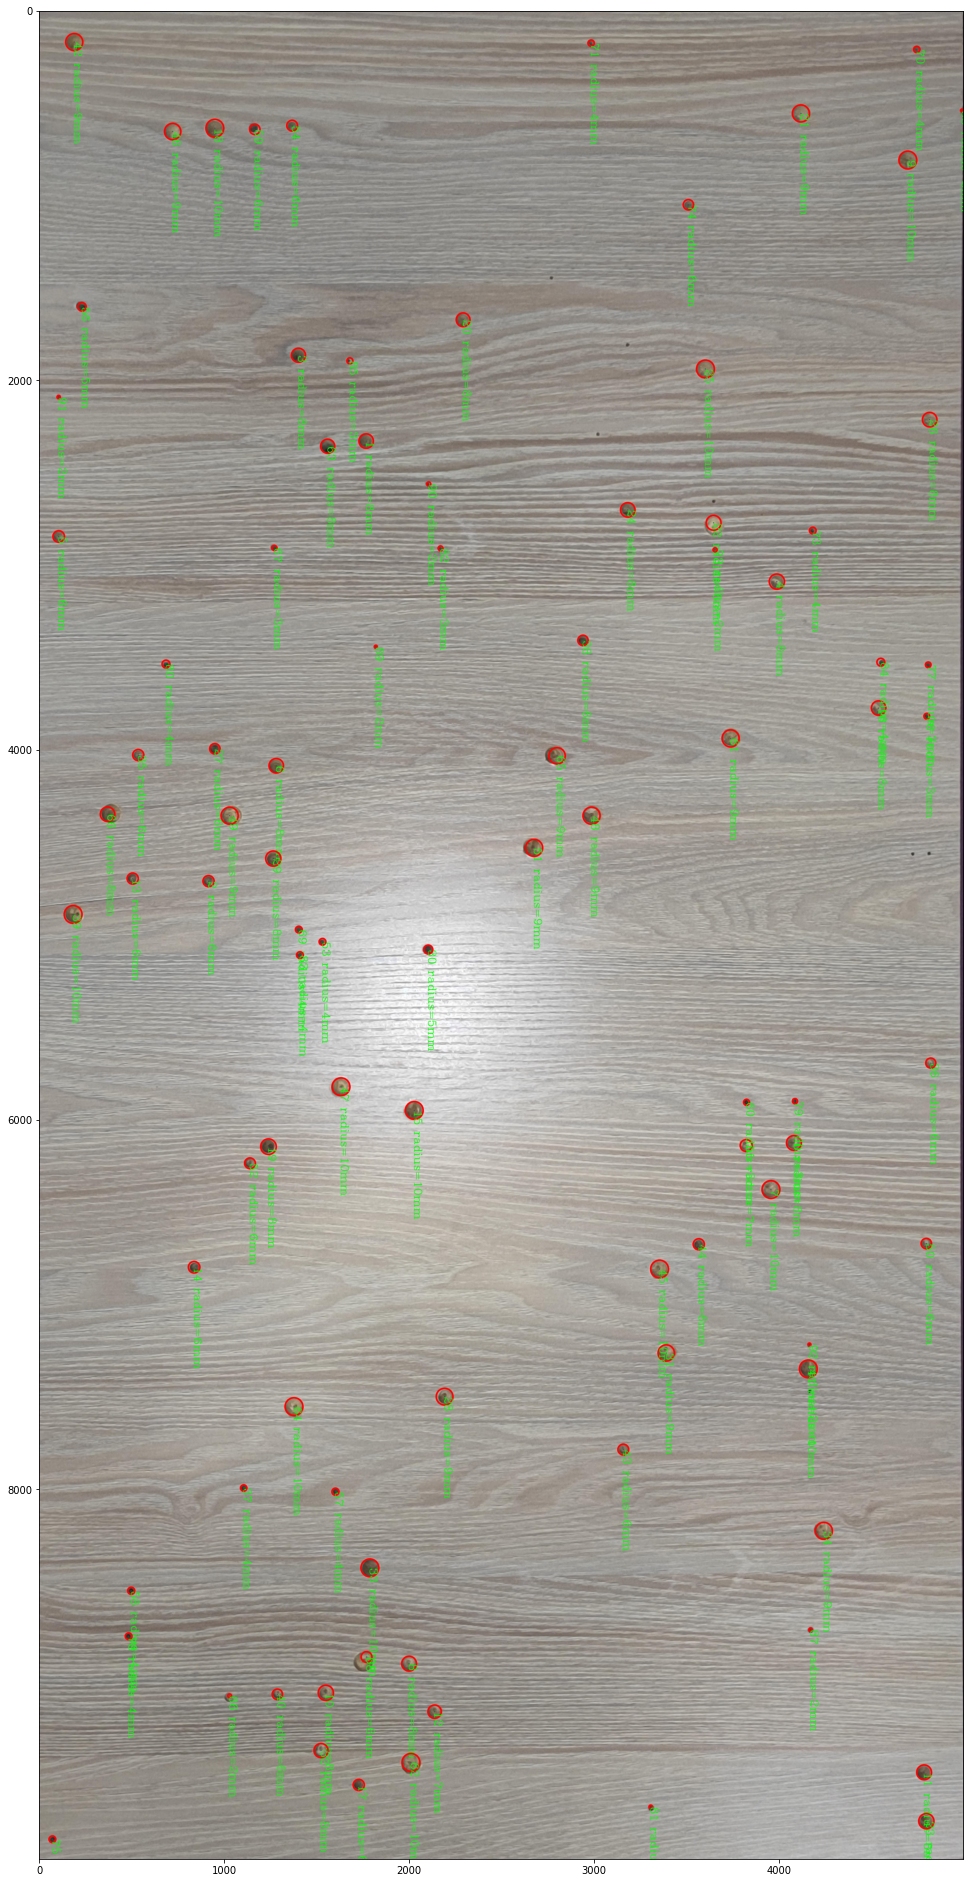

In [16]:
img_tmp = img.copy()
count = 0
r_pred = []
y_pred = []

for circle in circles[0]:
    center = (int(circle[0]),int(circle[1]))
    cv2.circle(img_tmp, center, 1, (0, 100, 100), 3)
    cv2.circle(img_tmp, center, int(circle[2]), (255, 0, 0), 7)
    cv2.putText(img_tmp, f'{str(count)} radius={round(circle[2] / 5)}mm ', center,
                    cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    print(f"{count + 1}.({circle[0]}, {circle[1]}), diameter: {round(circle[2] / 5)}")
    
    y_pred.append([circle[0], circle[1], round(circle[2] / 5)])
    
    count += 1
    
img_tmp = ndimage.rotate(img_tmp, -90)
np.savetxt("pred_circles.txt", y_pred, fmt='%d', delimiter=',')
plt.figure(figsize=(18, 34))
plt.imshow(img_tmp)

In [17]:
svc.__dict__

{'dual': True,
 'tol': 0.0001,
 'C': 1.0,
 'multi_class': 'ovr',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'verbose': 0,
 'random_state': None,
 'max_iter': 1000,
 'penalty': 'l2',
 'loss': 'squared_hinge',
 'n_features_in_': 3,
 'classes_': array([0., 1.]),
 'coef_': array([[ 1.39301519,  0.7147997 , -2.64761099]]),
 'intercept_': array([2.46208324]),
 'n_iter_': 1000}

In [18]:
94 /99

0.9494949494949495